## MODELOS DE SERIES DE TIEMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer la data de Demanda en sector eléctrico

In [2]:
demanda_electrico_original = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_original

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

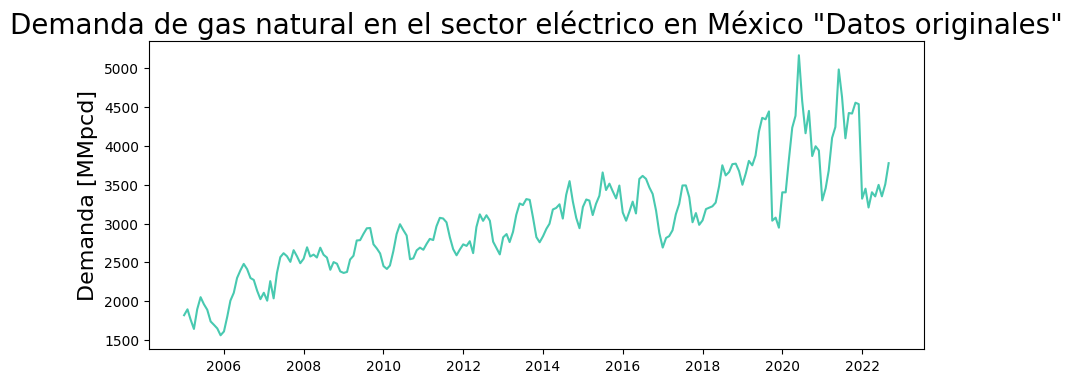

In [3]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original['Date'], demanda_electrico_original['Demanded_Gas'], color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual

In [66]:
demanda_electrico_original['Demanded_Gas']

0      1819.58
1      1895.33
2      1765.86
3      1642.70
4      1895.54
        ...   
208    3350.03
209    3498.70
210    3350.97
211    3506.42
212    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

The error "ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None" occurs when the seasonal_decompose function from the statsmodels.tsa.seasonal module is not able to determine the frequency of the time series data automatically
1
3
4
. To solve this error, you need to specify the frequency of the time series data explicitly by setting the period parameter in the seasonal_decompose function
1
3
4
. The period parameter specifies the number of data points in each seasonal cycle of the time series data. For example, if the time series data has a seasonal cycle of 12 months, the period parameter should be set to 12.

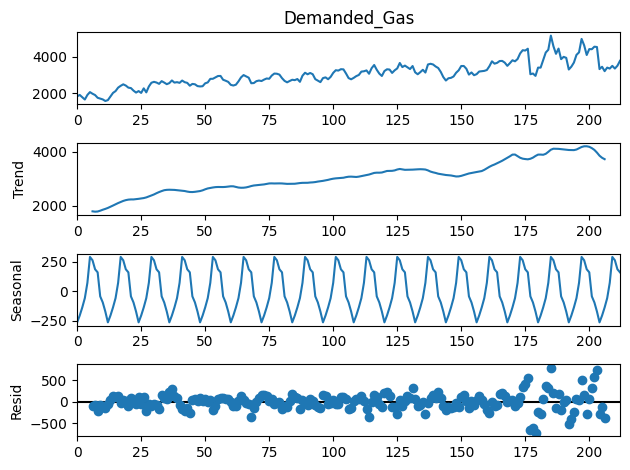

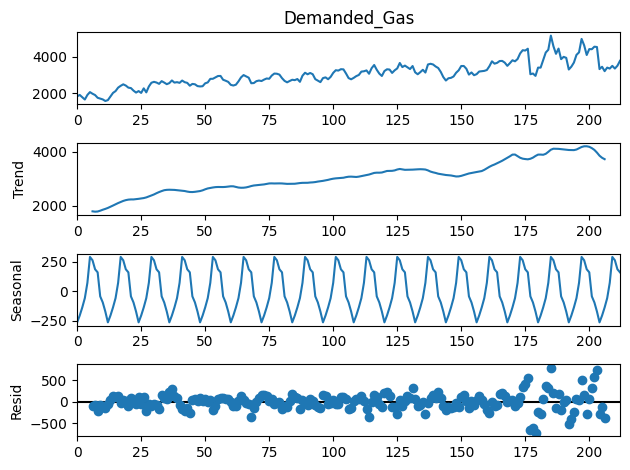

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

demanda_electrico_original_seasonal_decomposition = seasonal_decompose(demanda_electrico_original['Demanded_Gas'], period=12)
demanda_electrico_original_seasonal_decomposition.plot()

Se lleva a cabo el proceso de prueba estacionariedad de Dickey-Fulley a la Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_electrico_original_sin_diferenciar = adfuller(demanda_electrico_original['Demanded_Gas'])


adf_test_electrico_original_sin_diferenciar

(-1.9362234591018264,
 0.31521693975114506,
 15,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 2667.963876967698)

En la prueba DF H0 que establece que la serie NO es estacionaria. Es decir que el valor de la Unit Root p=1 y por lo tanto la serie era una especie de ruido blanco. 
Ha: Establece qe p<1 y por lo tanto la serie tiene un componente determinístico que la hace tender hacia un valor medio  

In [6]:

print(f"The ADF statistic value f is: {adf_test_electrico_original_sin_diferenciar[0]}")

print(f"The ADF p value p is: {adf_test_electrico_original_sin_diferenciar[1]}")

if adf_test_electrico_original_sin_diferenciar[0] < adf_test_electrico_original_sin_diferenciar[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")


The ADF statistic value f is: -1.9362234591018264
The ADF p value p is: 0.31521693975114506
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad


Se observa que el valor de p NO es menor a 0.05 porlo que NO se rechaza 

Se elaboran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos originales"

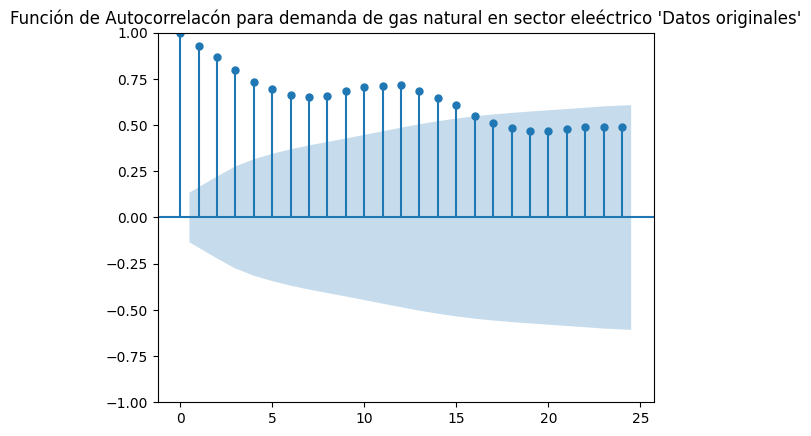

In [7]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


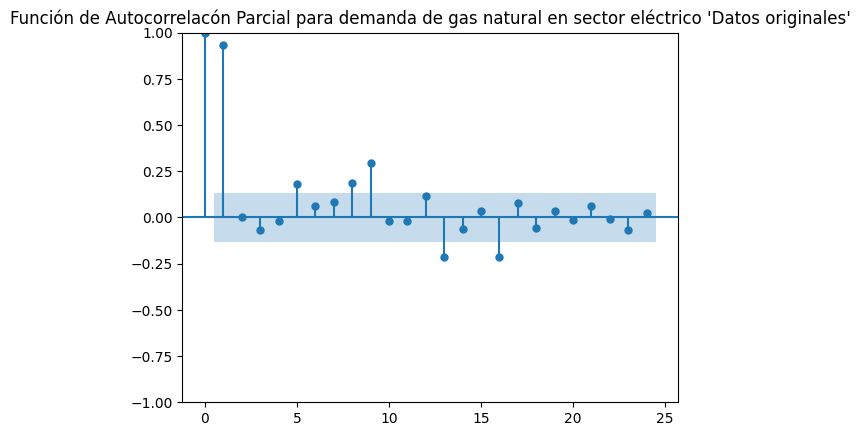

In [8]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [9]:
demanda_electrico_original_diff1 = demanda_electrico_original['Demanded_Gas'].diff()
demanda_electrico_original_diff1

0         NaN
1       75.75
2     -129.47
3     -123.16
4      252.84
        ...  
208    -53.41
209    148.67
210   -147.73
211    155.45
212    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

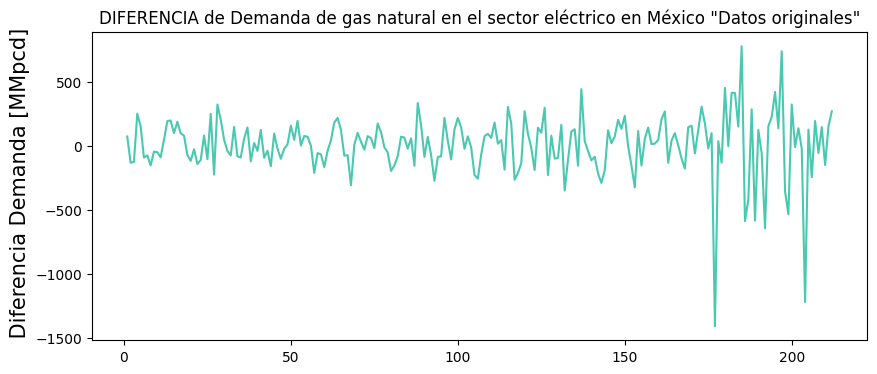

In [10]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México "Datos originales"')
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se lleva a cabo el proceso de prueba estacionariedad de Dickey-Fulley a la DIFERENCIA1 Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for infinite or NaN values
demanda_electrico_original_diff1.dropna(inplace=True)

# Perform ADF test
adf_test_electrico_original_diferencia1 = adfuller(demanda_electrico_original_diff1)


adf_test_electrico_original_diferencia1

(-4.063276407512048,
 0.001113114789436488,
 15,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 2657.205881461088)

Se observa que el valor de p SI es menor a 0.05 porlo que SI se rechaza H0 que establece que la serie NO es estacionaria. 

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

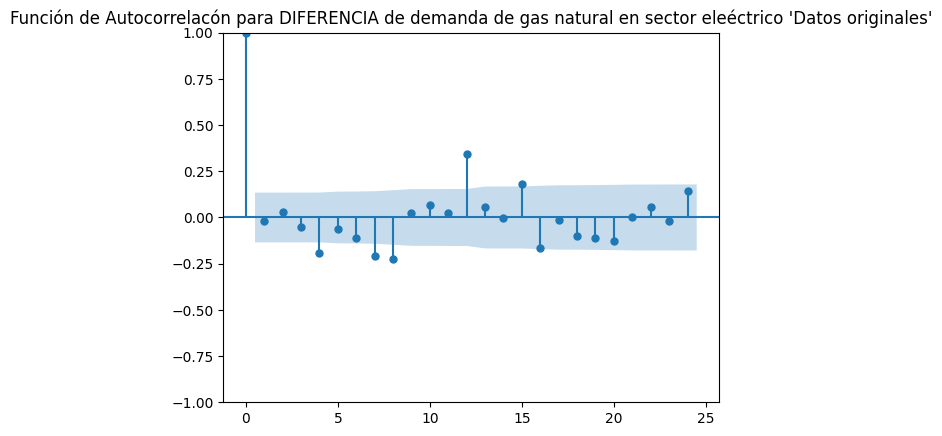

In [12]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


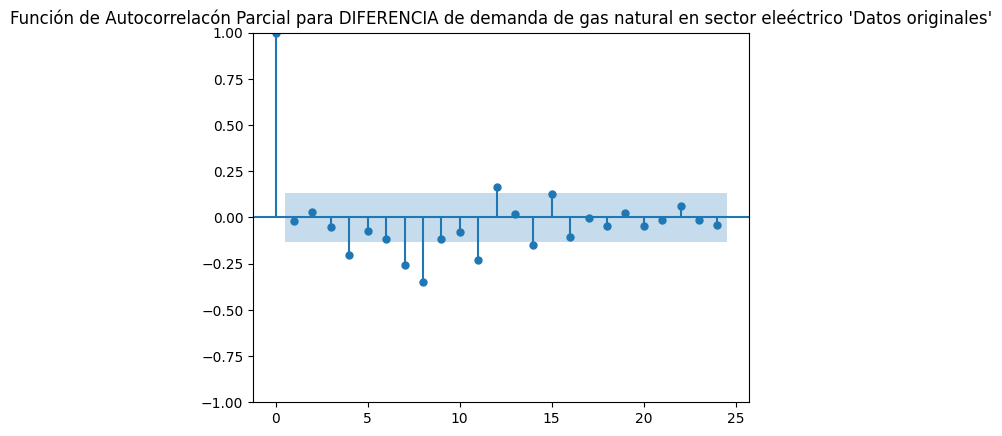

In [13]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [77]:
demanda_electrico_original

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


In [14]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
196,2021-05-01,4243.93
197,2021-06-01,4985.53
198,2021-07-01,4631.85
199,2021-08-01,4098.81


Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos originales"

In [15]:
import pandas as pd
import numpy as np

# Load time series data into Pandas DataFrame
df_demanda_electrico_original_train_data = pd.DataFrame(demanda_electrico_original_train_data) 
df_demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
196,2021-05-01,4243.93
197,2021-06-01,4985.53
198,2021-07-01,4631.85
199,2021-08-01,4098.81


Se observa la distribución de probabilidad de la Demanda de gas natural en sector eléctrico "Datos originales" 

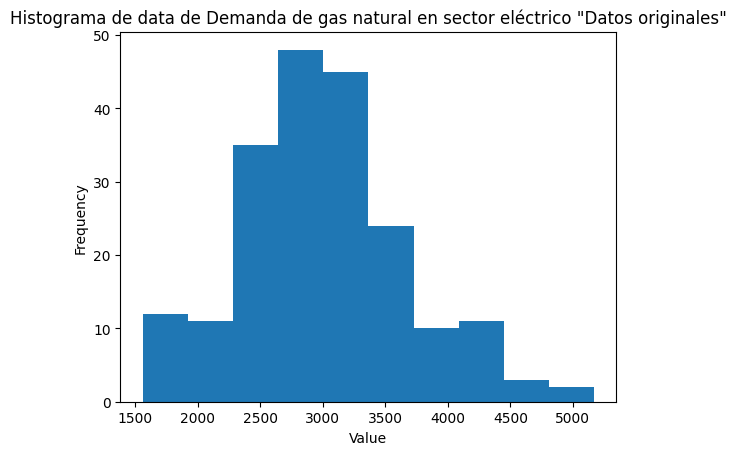

In [16]:
# Generate the histogram
plt.hist(df_demanda_electrico_original_train_data['Demanded_Gas'], bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

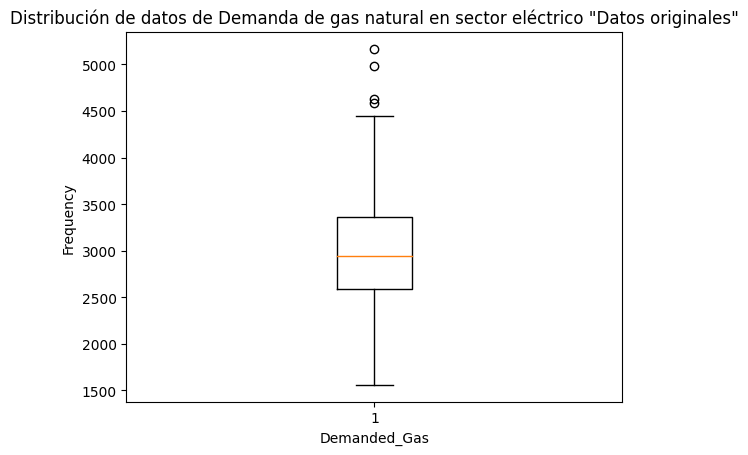

In [17]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(df_demanda_electrico_original_train_data['Demanded_Gas'])

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos originales'

In [82]:

##Create the model
model_ARIMA_electrico_original = ARIMA (demanda_electrico_original_train_data['Demanded_Gas'], order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_original_fit = model_ARIMA_electrico_original.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_original_fit.summary())


Model fitting time 0.7389707565307617
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.392
Date:                Tue, 19 Sep 2023   AIC                           2684.783
Time:                        21:45:13   BIC                           2714.468
Sample:                             0   HQIC                          2696.796
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.074     11.229      0.000       0.686       0.976
ar.L2         -0.4263      0.067     -6.332      0.000      -0.558      -0.294
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [83]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico_original = model_ARIMA_electrico_original_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_original)

201    4116.760353
202    3938.306019
203    4073.956534
204    3890.889753
205    3786.363557
206    4046.456309
207    4033.246030
208    3975.558960
209    4247.672609
210    4266.689838
211    4127.559924
212    4289.069773
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

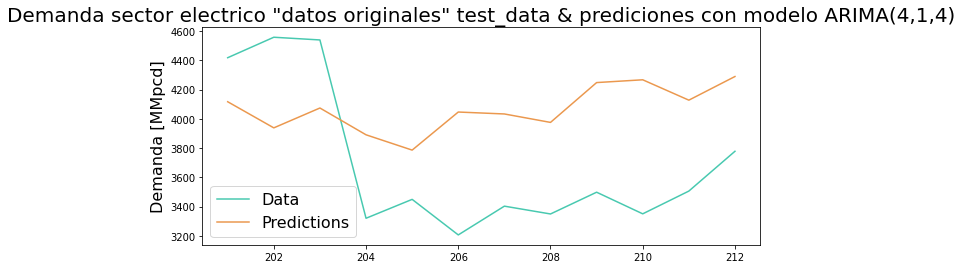

In [84]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='#48C9B0')
plt.plot(predictions_model_ARIMA_electrico_original, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo ARIMA(4,1,4)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [85]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_original = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_original)
RMSE_predictions_model_ARIMA_electrico_original = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_original))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_original)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_original)

MAPE: 0.16739974297359148
RMSE: 623.6320827738078



## Modelo Autoarima para la serie de  la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [18]:
import pmdarima as pm

# Obtain the recommended order of the ARIMA model
best_model = pm.auto_arima(demanda_electrico_original_train_data['Demanded_Gas'])

# Instantiate the ARIMA model with the recommended order
model_ARIMA_electrico_data_original = ARIMA(
    demanda_electrico_original_train_data['Demanded_Gas'], order=best_model.order
)

# Fit the model
model_ARIMA_electrico_data_original_fit_autorima = model_ARIMA_electrico_data_original.fit()

##Summary of the model 
print(model_ARIMA_electrico_data_original_fit_autorima.summary())

                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1363.100
Date:                Thu, 21 Sep 2023   AIC                           2728.200
Time:                        10:23:01   BIC                           2731.498
Sample:                             0   HQIC                          2729.534
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.869e+04   2110.739     23.066      0.000    4.45e+04    5.28e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               724.91
Prob(Q):                              0.99   Pr

Hagamos predicciones con el modelo AUTOARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [20]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico_data_original_fit_autorima = model_ARIMA_electrico_data_original_fit_autorima.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_data_original_fit_autorima)

201    4424.39
202    4424.39
203    4424.39
204    4424.39
205    4424.39
206    4424.39
207    4424.39
208    4424.39
209    4424.39
210    4424.39
211    4424.39
212    4424.39
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

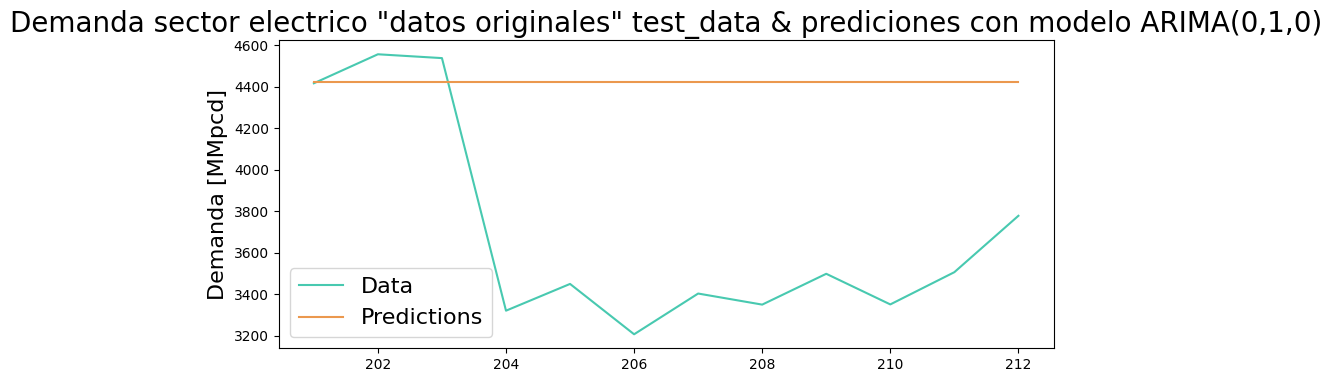

In [21]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='#48C9B0')
plt.plot(predictions_model_ARIMA_electrico_data_original_fit_autorima, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo ARIMA(0,1,0)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo AUTOARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [22]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_data_original_fit_autorima = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_data_original_fit_autorima)
RMSE_predictions_model_ARIMA_electrico_data_original_fit_autorima = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_data_original_fit_autorima))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_data_original_fit_autorima)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_data_original_fit_autorima)

MAPE: 0.22406667362087576
RMSE: 873.0479594405646


### Proceso de Pretratamient (Ajuste de vaores atípicos por media aritmetica de serie)  como una estrategia para mejorar los resultados de forecast de modelos ARIMA 

Se define la función que ayudará a la sustitución de outliers por la media aritetica del valor y a lo largo del tiempo

In [86]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

In [87]:

demanda_electrico_tratamiento1_train_data = remove_replace_outliers(demanda_electrico_original_train_data['Demanded_Gas'])
demanda_electrico_tratamiento1_train_data

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14124\3726851835.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[outliers_mask] = historical_mean


0      1819.580000
1      1895.330000
2      1765.860000
3      2944.216952
4      1895.540000
          ...     
196    4243.930000
197    2944.216952
198    2944.216952
199    4098.810000
200    2944.216952
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers)


Text(0, 0.5, 'Demanda [MMpcd]')

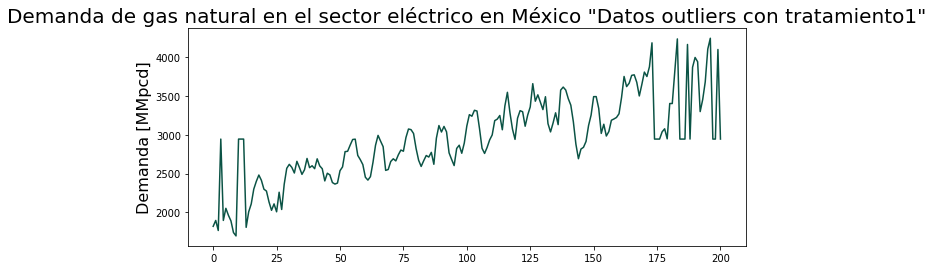

In [88]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_train_data, color='#0B5345')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos outliers con tratamiento1"

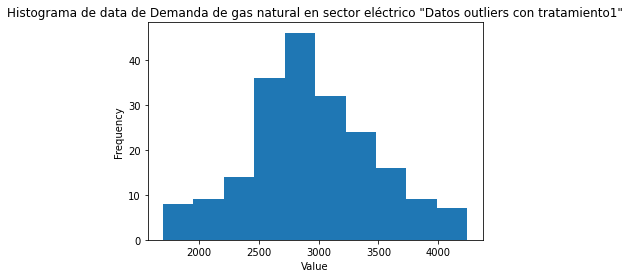

In [89]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

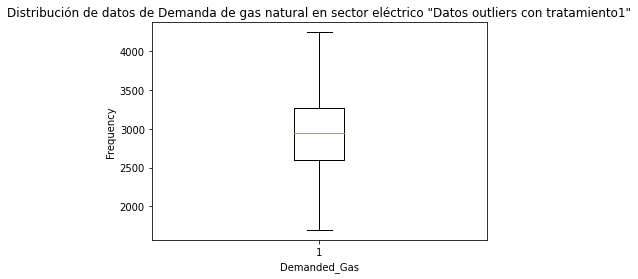

In [90]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_tratamiento1_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

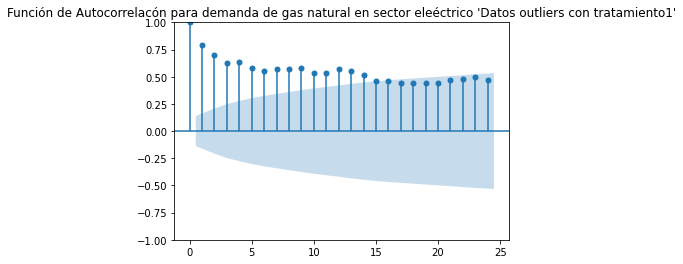

In [91]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


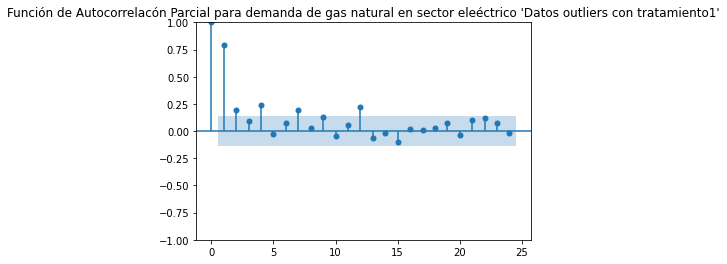

In [92]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda_electrico_tratamiento1_train_data 

In [93]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_tratamiento1_train_data = adfuller(demanda_electrico_tratamiento1_train_data)


adf_test_demanda_electrico_tratamiento1_train_data

(-1.1674638525703216,
 0.687433065014806,
 11,
 189,
 {'1%': -3.4654311561944873,
  '5%': -2.8769570530458792,
  '10%': -2.574988319755886},
 2587.340568073859)

In [94]:

print(f"The ADF statistic value f is: {adf_test_demanda_electrico_tratamiento1_train_data[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_tratamiento1_train_data[1]}")

if adf_test_demanda_electrico_tratamiento1_train_data[0] < adf_test_demanda_electrico_tratamiento1_train_data[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")


The ADF statistic value f is: -1.1674638525703216
The ADF p value p is: 0.687433065014806
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad


También para este caso  se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México


In [95]:
demanda_electrico_tratamiento1_diff1 = demanda_electrico_tratamiento1_train_data.diff()
demanda_electrico_tratamiento1_diff1

0              NaN
1        75.750000
2      -129.470000
3      1178.356952
4     -1048.676952
          ...     
196     139.110000
197   -1299.713048
198       0.000000
199    1154.593048
200   -1154.593048
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1" DIFERENCIA 1

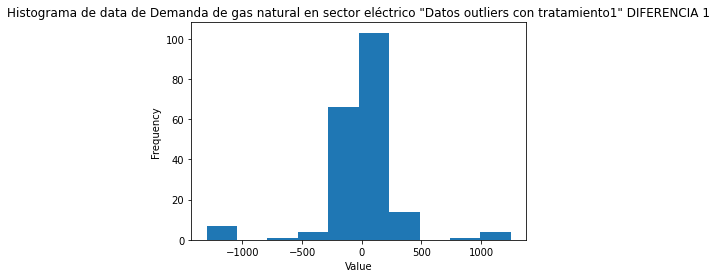

In [96]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda_electrico_tratamiento1_train_data con una diferencia 

In [97]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_tratamiento1_train_data_diff1 = adfuller(demanda_electrico_tratamiento1_diff1.dropna())


adf_test_demanda_electrico_tratamiento1_train_data_diff1

(-6.518615852472467,
 1.055865744285777e-08,
 11,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 2573.4576689312335)

In [98]:
print(f"The ADF statistic value f is: {adf_test_demanda_electrico_tratamiento1_train_data_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_tratamiento1_train_data_diff1[1]}")

if adf_test_demanda_electrico_tratamiento1_train_data_diff1[0] < adf_test_demanda_electrico_tratamiento1_train_data_diff1[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")


The ADF statistic value f is: -6.518615852472467
The ADF p value p is: 1.055865744285777e-08
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad


Text(0, 0.5, 'Demanda [MMpcd]')

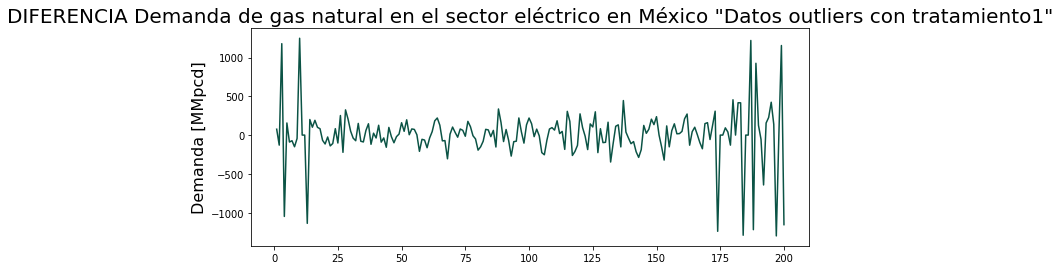

In [99]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_diff1, color='#0B5345')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

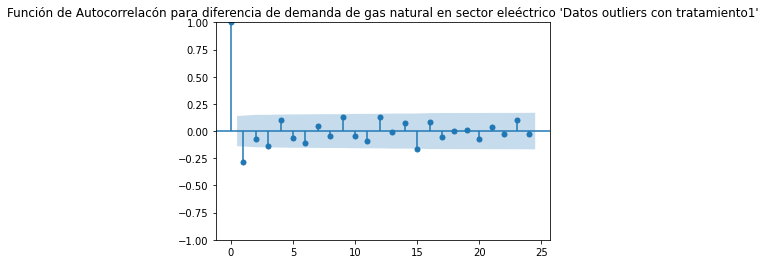

In [100]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


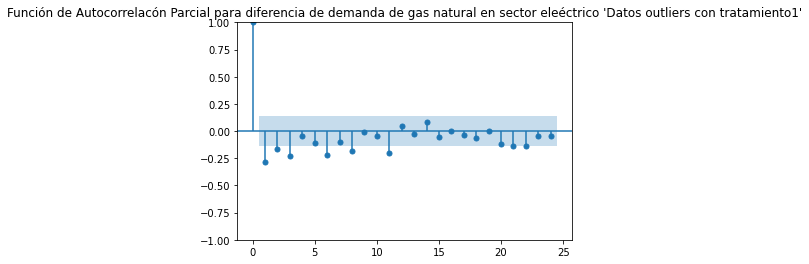

In [101]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos outliers con tratamiento1'

In [102]:
##Create the model
model_ARIMA_electrico_tratamiento1 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(3,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_fit = model_ARIMA_electrico_tratamiento1.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_fit.summary())


Model fitting time 0.636497974395752
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1411.450
Date:                Tue, 19 Sep 2023   AIC                           2836.900
Time:                        21:45:17   BIC                           2859.988
Sample:                             0   HQIC                          2846.243
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1542      0.077    -15.078      0.000      -1.304      -1.004
ar.L2         -0.1835      0.127     -1.450      0.147      -0.432       0.065
ar.L3          

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]


In [104]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1 = model_ARIMA_electrico_tratamiento1_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1)

201    3318.446337
202    3253.094529
203    3547.356237
204    3353.666834
205    3499.833857
206    3472.005937
207    3407.966216
208    3539.313841
209    3389.498598
210    3515.391538
211    3444.594087
212    3449.577655
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

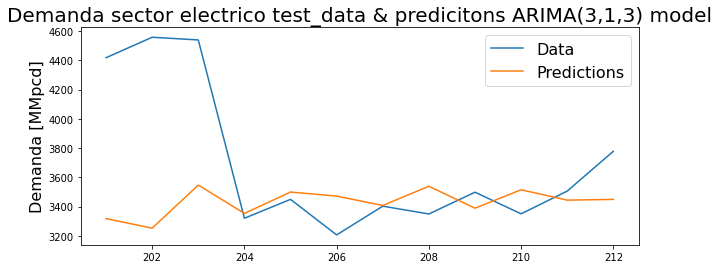

In [105]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(3,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1

In [106]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1)
RMSE_predictions_model_ARIMA_electrico_tratamiento1 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1)

MAPE: 0.091938709013092
RMSE: 588.2714729034742


Vamos a entrenar un segundo modelo 

In [107]:
##Create the model
model_ARIMA_electrico_tratamiento1_v2 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(2,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_v2_fit = model_ARIMA_electrico_tratamiento1_v2.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_v2_fit.summary())


Model fitting time 0.48486328125
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1415.670
Date:                Tue, 19 Sep 2023   AIC                           2843.340
Time:                        21:45:18   BIC                           2863.130
Sample:                             0   HQIC                          2851.349
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7844      0.096     -8.133      0.000      -0.973      -0.595
ar.L2         -0.2980      0.107     -2.788      0.005      -0.508      -0.088
ma.L1          0.30

In [108]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1_v2 = model_ARIMA_electrico_tratamiento1_v2_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1_v2)

201    3040.252569
202    3190.092501
203    3754.630386
204    3267.160395
205    3481.299828
206    3458.592972
207    3412.592124
208    3455.441278
209    3435.538659
210    3438.381387
211    3442.082403
212    3438.332245
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

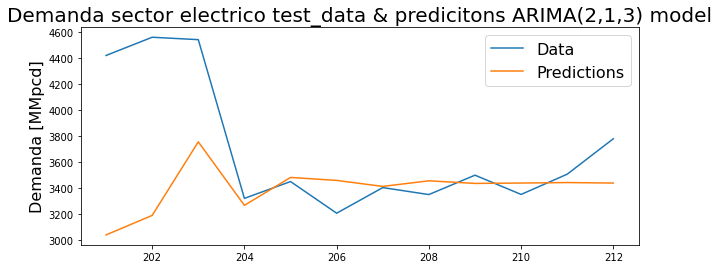

In [109]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1_v2)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(2,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1_v2

In [110]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2)
RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2)

MAPE: 0.08957857176534918
RMSE: 618.5396262654643


### Proceso de pretratamiento + normalización de data como forma de abordar los valores atípicos de la serie 

In [111]:
demanda_electrico_tratamiento1_train_data

0      1819.580000
1      1895.330000
2      1765.860000
3      2944.216952
4      1895.540000
          ...     
196    4243.930000
197    2944.216952
198    2944.216952
199    4098.810000
200    2944.216952
Name: Demanded_Gas, Length: 201, dtype: float64

In [112]:
demanda_electrico_original_test_data

,Date,Demanded_Gas
201,2021-10-01,4417.51
202,2021-11-01,4557.36
203,2021-12-01,4538.89
204,2022-01-01,3320.75
205,2022-02-01,3449.80
206,2022-03-01,3206.96
207,2022-04-01,3403.44
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97


Vamos a entrenar el miMax escaler 

In [113]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a MinMaxScaler object and fit it to the training data
MinMax_scaler_data_pre_tratada = MinMaxScaler()
MinMax_scaler_data_pre_tratada.fit(demanda_electrico_tratamiento1_train_data.values.reshape(-1, 1))


MinMaxScaler()

In [114]:

# Transform both the training and test data using the trained scaler
demanda_electrico_con_tratamiento1_scaled_train_data = MinMax_scaler_data_pre_tratada.transform(demanda_electrico_tratamiento1_train_data.values.reshape(-1, 1))
demanda_electrico_con_tratamiento1_scaled_train_data


array([[0.04853199],
       [0.07826107],
       [0.02744887],
       [0.48991054],
       [0.07834349],
       [0.13963838],
       [0.10444621],
       [0.07603581],
       [0.01694656],
       [0.        ],
       [0.48991054],
       [0.48991054],
       [0.48991054],
       [0.04333186],
       [0.12204034],
       [0.16184787],
       [0.23664742],
       [0.27588589],
       [0.30796582],
       [0.28145886],
       [0.23648651],
       [0.22683977],
       [0.17209116],
       [0.12953638],
       [0.1620598 ],
       [0.12201286],
       [0.22099599],
       [0.13371219],
       [0.26132551],
       [0.34195313],
       [0.36205117],
       [0.34671371],
       [0.31825228],
       [0.37728266],
       [0.34617211],
       [0.31140773],
       [0.3345395 ],
       [0.39186267],
       [0.34528514],
       [0.35492011],
       [0.34026162],
       [0.38998277],
       [0.35425685],
       [0.33985345],
       [0.27822497],
       [0.31705527],
       [0.30887241],
       [0.270

In [115]:
##Create the model
model_ARIMA_electrico_pretratamiento_e_normalize = ARIMA (demanda_electrico_con_tratamiento1_scaled_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_pretratamiento_e_normalize_fit = model_ARIMA_electrico_pretratamiento_e_normalize.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_pretratamiento_e_normalize_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model fitting time 0.6897962093353271
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 155.494
Date:                Tue, 19 Sep 2023   AIC                           -292.987
Time:                        21:45:19   BIC                           -263.302
Sample:                             0   HQIC                          -280.974
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8423      1.361     -0.619      0.536      -3.510       1.825
ar.L2         -0.3159      1.129     -0.280      0.780      -2.529       1.897
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_pretratamiento_e_normalize = model_ARIMA_electrico_pretratamiento_e_normalize_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_pretratamiento_e_normalize)

[0.53866714 0.59839408 0.7667568  0.60018059 0.70297486 0.70679151
 0.65230325 0.70347869 0.68672696 0.67433432 0.69561574 0.68251065]


In [117]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = MinMax_scaler_data_pre_tratada.inverse_transform(predictions_model_ARIMA_electrico_pretratamiento_e_normalize.reshape(-1, 1))
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale

array([[3068.44927008],
       [3220.63410838],
       [3649.62399185],
       [3225.18614719],
       [3487.10697434],
       [3496.83183365],
       [3357.99519677],
       [3488.39074195],
       [3445.70717399],
       [3414.13059523],
       [3468.35586289],
       [3434.9639524 ]])

In [118]:
demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

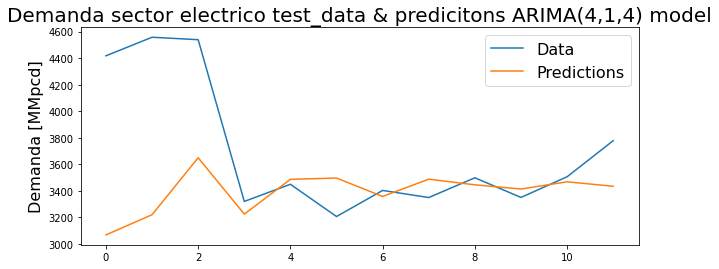

In [119]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values)
plt.plot(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_normalize_original_rescale

In [120]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
# Compute errors
MAPE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
RMSE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)

MAPE: 0.09291620507638208
RMSE: 621.7936389559914


##  Usando Autoarima 

In [125]:
import pmdarima as pm

# Obtain the recommended order of the ARIMA model
best_model = pm.auto_arima(demanda_electrico_con_tratamiento1_scaled_train_data)

# Instantiate the ARIMA model with the recommended order
model_ARIMA_electrico_pretratamiento_e_normalize = ARIMA(
    demanda_electrico_con_tratamiento1_scaled_train_data, order=best_model.order
)

# Fit the model
model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima = model_ARIMA_electrico_pretratamiento_e_normalize.fit()

##Summary of the model 
print(model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 148.221
Date:                Tue, 19 Sep 2023   AIC                           -290.442
Time:                        22:15:39   BIC                           -280.547
Sample:                             0   HQIC                          -286.438
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5524      0.052    -10.697      0.000      -0.654      -0.451
ma.L2         -0.2752      0.053     -5.196      0.000      -0.379      -0.171
sigma2         0.0132      0.001     11.903      0.0

In [126]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima = model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima)

[0.60152032 0.695064   0.695064   0.695064   0.695064   0.695064
 0.695064   0.695064   0.695064   0.695064   0.695064   0.695064  ]


In [127]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima_rescale = MinMax_scaler_data_pre_tratada.inverse_transform(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima.reshape(-1, 1))
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima_rescale

array([[3228.59978565],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063],
       [3466.95003063]])

Text(0, 0.5, 'Demanda [MMpcd]')

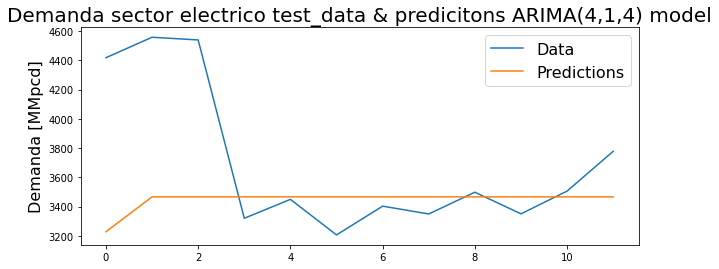

In [128]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values)
plt.plot(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_fit_autorima_rescale)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)